In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [6]:
x_train[0].shape

(32, 32, 3)

In [7]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 35s 21ms/step - loss: 1.3265 - accuracy: 0.5429 - val_loss: 1.1389 - val_accuracy: 0.6106
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8691 - accuracy: 0.6987 - val_loss: 0.8744 - val_accuracy: 0.7011
Epoch 3/50
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7052 - accuracy: 0.7571 - val_loss: 0.8100 - val_accuracy: 0.7210
Epoch 4/50
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5874 - accuracy: 0.7977 - val_loss: 0.6465 - val_accuracy: 0.7877
Epoch 5/50
1563/1563 [==============================] - 32s 20ms/step - loss: 0.4989 - accuracy: 0.8288 - val_loss: 0.6419 - val_accuracy: 0.7874
Epoch 6/50
1563/1563 [==============================] - 32s 21ms/step - loss: 0.4256 - accuracy: 0.8542 - val_loss: 0.6218 - val_accuracy: 0.7941
Epoch 7/50
1563/1563 [==============================] - 32s 20ms/step - loss: 0.3531 - accuracy: 0.8772 - val_loss: 0.6164 -

In [10]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
1562/1562 [==============================] - 56s 35ms/step - loss: 0.5364 - accuracy: 0.8274 - val_loss: 0.5191 - val_accuracy: 0.8341
Epoch 2/50
1562/1562 [==============================] - 55s 35ms/step - loss: 0.4393 - accuracy: 0.8551 - val_loss: 0.4907 - val_accuracy: 0.8416
Epoch 3/50
1562/1562 [==============================] - 55s 35ms/step - loss: 0.4005 - accuracy: 0.8656 - val_loss: 0.4508 - val_accuracy: 0.8546
Epoch 4/50
1562/1562 [==============================] - 55s 35ms/step - loss: 0.3814 - accuracy: 0.8731 - val_loss: 0.4622 - val_accuracy: 0.8472
Epoch 5/50
1562/1562 [==============================] - 55s 35ms/step - loss: 0.3595 - accuracy: 0.8810 - val_loss: 0.4441 - val_accuracy: 0.8587
Epoch 6/50
1562/1562 [==============================] - 55s 35ms/step - loss: 0.3506 - accuracy: 0.8833 - val_loss: 0.4139 - val_accuracy: 0.8604
Epoch 7/50
1562/1562 [==============================] - 55s 35ms/step - loss: 0.3336 - accuracy: 0.8876 - val_loss: 0.4196 -

**Observation:**

We are getting a lower training accuracy but a higher Validation accuracy. Hence, there is lesser Overfitting. Therefore, the model has improved.

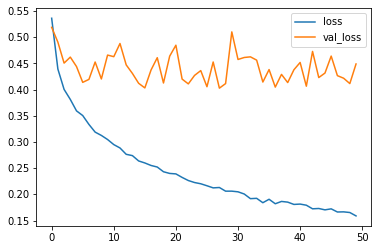

In [11]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

**Observation:**

A much better learning curve than before. 

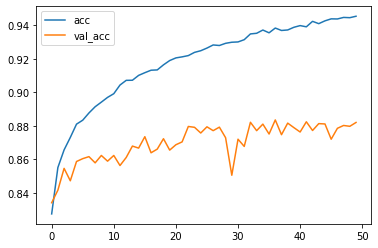

In [12]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[914   9  26   9   3   2   2   7  18  10]
 [  3 955   0   4   0   2   0   0   6  30]
 [ 24   1 855  28  20  29  14  22   3   4]
 [  7   4  31 775  17 101  22  31   2  10]
 [  4   1  44  45 814  24  19  45   2   2]
 [  3   2  23 105  12 821   9  23   1   1]
 [  6   2  33  40   4  14 895   4   1   1]
 [  6   1   5  10  10  16   2 947   0   3]
 [ 47  13   4   3   1   6   1   2 906  17]
 [  7  37   2   1   1   2   1   4   7 938]]


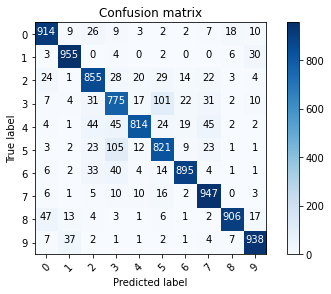

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



**Observation:** 
Much lesser misclassifications as promised before.


Lets check the two most wrong predictions.

a. True Label = 5, Predicted Label = 3, Value = 109

b. True Label = 3, Predicted Label = 5, Value = 71

c True Label = 3, Predicted Label = 6, Value = 52

d. b. True Label = 7, Predicted Label = 4, Value = 20

So, in 'a' and 'b', 3 and 5 are getting confused very often, i.e. the Cats and Dogs are getting confused very often. And that does make sense to me because the images are so small that its easy to confuse a cat with a dog.

In 'c', 3 'cat' and 6 'frog' are getting confused too. That too makes sense to me because if we look at frog in this dataset, they just appear as little brown blobs.

In 'd', 7 'horse' and 4 'deer' are getting confused too. That too makes sense to me because they are both 4 legged animal that kind of look the same. 

In [14]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

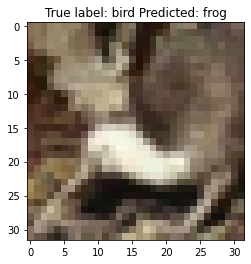

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

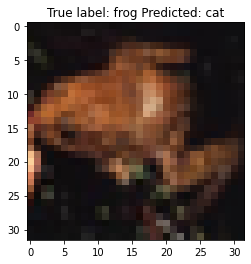

In [16]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

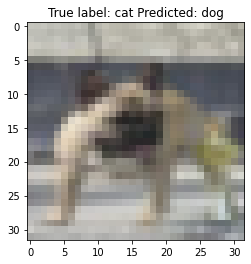

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

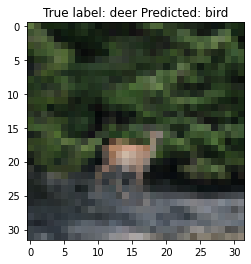

In [18]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [19]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     